<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/car-sales/car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal 

* Predict car sales price using Neaural Networks

[Link to the dataset from kaggle](https://www.kaggle.com/datasets/gagandeep16/car-sales?select=Car_sales.csv)

In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Import & Analyse Data

In [59]:

!wget https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/car-sales/car-sales.csv

--2022-05-18 09:54:00--  https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/car-sales/car-sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16018 (16K) [text/plain]
Saving to: ‘car-sales.csv.4’

car-sales.csv.4     100%[===================>]  15.64K  --.-KB/s    in 0s      

2022-05-18 09:54:00 (111 MB/s) - ‘car-sales.csv.4’ saved [16018/16018]



In [60]:
df = pd.read_csv('car-sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [61]:
categorical = [x for x in df.columns if df[x].dtype == 'O']
numerical = [x for x in df.columns if df[x].dtype != 'O']
categorical, numerical

(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'],
 ['Sales_in_thousands',
  '__year_resale_value',
  'Price_in_thousands',
  'Engine_size',
  'Horsepower',
  'Wheelbase',
  'Width',
  'Length',
  'Curb_weight',
  'Fuel_capacity',
  'Fuel_efficiency',
  'Power_perf_factor'])

## Explore Categorical Data

Since we have less categorical data. Let's explore it first

In [62]:
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Manufacturer   157 non-null    object
 1   Model          157 non-null    object
 2   Vehicle_type   157 non-null    object
 3   Latest_Launch  157 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [63]:
# Convert all categorical data except for the date column to lowercase for better analysis
for x in categorical:
  if x != 'Latest_Launch':
    df[x] = df[x].str.lower()

In [64]:
for x in categorical:
  print(x, df[x].unique())
  print('\n')

Manufacturer ['acura' 'audi' 'bmw' 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge'
 'ford' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'lexus' 'lincoln'
 'mitsubishi' 'mercury' 'mercedes-b' 'nissan' 'oldsmobile' 'plymouth'
 'pontiac' 'porsche' 'saab' 'saturn' 'subaru' 'toyota' 'volkswagen'
 'volvo']


Model ['integra' 'tl' 'cl' 'rl' 'a4' 'a6' 'a8' '323i' '328i' '528i' 'century'
 'regal' 'park avenue' 'lesabre' 'deville' 'seville' 'eldorado' 'catera'
 'escalade' 'cavalier' 'malibu' 'lumina' 'monte carlo' 'camaro' 'corvette'
 'prizm' 'metro' 'impala' 'sebring coupe' 'sebring conv.' 'concorde'
 'cirrus' 'lhs' 'town & country' '300m' 'neon' 'avenger' 'stratus'
 'intrepid' 'viper' 'ram pickup' 'ram wagon' 'ram van' 'dakota' 'durango'
 'caravan' 'escort' 'mustang' 'contour' 'taurus' 'focus' 'crown victoria'
 'explorer' 'windstar' 'expedition' 'ranger' 'f-series' 'civic' 'accord'
 'cr-v' 'passport' 'odyssey' 'accent' 'elantra' 'sonata' 'i30' 's-type'
 'wrangler' 'cherokee' 'grand cherokee'

In [65]:
df[categorical].isnull().sum()

Manufacturer     0
Model            0
Vehicle_type     0
Latest_Launch    0
dtype: int64

Categorical Data seems to be cleaned with no missing values

## Explore numerical data

In [66]:
df[numerical].isnull().sum()

Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

Since numerical data has missing values. Let's interpolate the median into the missing spots and then run an IQR assesment to check for outliers

In [67]:
# Replace the missing values with the median
for x in numerical:
  if df[x].isnull().sum():
    df[x].fillna(value=df[x].median(), inplace=True)

df[numerical].isnull().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [68]:
# Functions to apply the assesment of the IQR assesment
def max_value(df2, variable, top):
    return np.where(df2[variable] > top, top, df2[variable])

def min_value(df2, variable, top):
    return np.where(df2[variable] < top, top, df2[variable])


In [69]:
# Run IQR assesment to check and cap outliers (low & high)
outliers_max = {}
outliers_min = {}
for x in df[numerical]:
  IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
  Lower_fence = df[x].quantile(0.25) - (IQR * 3)
  Upper_fence = df[x].quantile(0.75) + (IQR * 3)
  
  print('min', df[x].min(), 'max', df[x].max())
  print('{name} outliers are values < {lowerboundary} or > {upperboundary} \n'.format(
  name=x, lowerboundary=Lower_fence, upperboundary=Upper_fence))
  outliers_max[x] = Upper_fence
  outliers_min[x] = Lower_fence



min 0.11 max 540.561
Sales_in_thousands outliers are values < -147.412 or > 229.48200000000003 

min 5.16 max 67.55
__year_resale_value outliers are values < -4.240000000000004 or > 34.925000000000004 

min 9.235 max 85.5
Price_in_thousands outliers are values < -23.210000000000004 or > 73.285 

min 1.0 max 8.0
Engine_size outliers are values < -1.3000000000000007 or > 7.1000000000000005 

min 55.0 max 450.0
Horsepower outliers are values < -45.0 or > 410.0 

min 92.6 max 138.7
Wheelbase outliers are values < 75.39999999999999 or > 139.8 

min 62.6 max 79.9
Width outliers are values < 53.400000000000006 or > 88.4 

min 149.4 max 224.5
Length outliers are values < 122.1 or > 251.6 

min 1.895 max 5.572
Curb_weight outliers are values < 0.5660000000000003 or > 6.186999999999999 

min 10.3 max 32.0
Fuel_capacity outliers are values < 4.700000000000003 or > 30.599999999999998 

min 15.0 max 45.0
Fuel_efficiency outliers are values < 6.0 or > 41.0 

min 23.27627233 max 188.144323
Power_perf

Using IQR we can see that the numerical has a lot of outliers. Let's remove them

In [70]:
# Apply Max to outliers
for x in outliers_max:
  df[x] = max_value(df, x, outliers_max[x])

# Apply min to outliers
for x in outliers_min:
  df[x] = min_value(df, x, outliers_min[x])

In [71]:
# Horsepower had outliers so lets check for its max now to see if the ourliers were capped.
df['Horsepower'].max()

410.0

## Visualize

In [72]:
len(numerical)

12

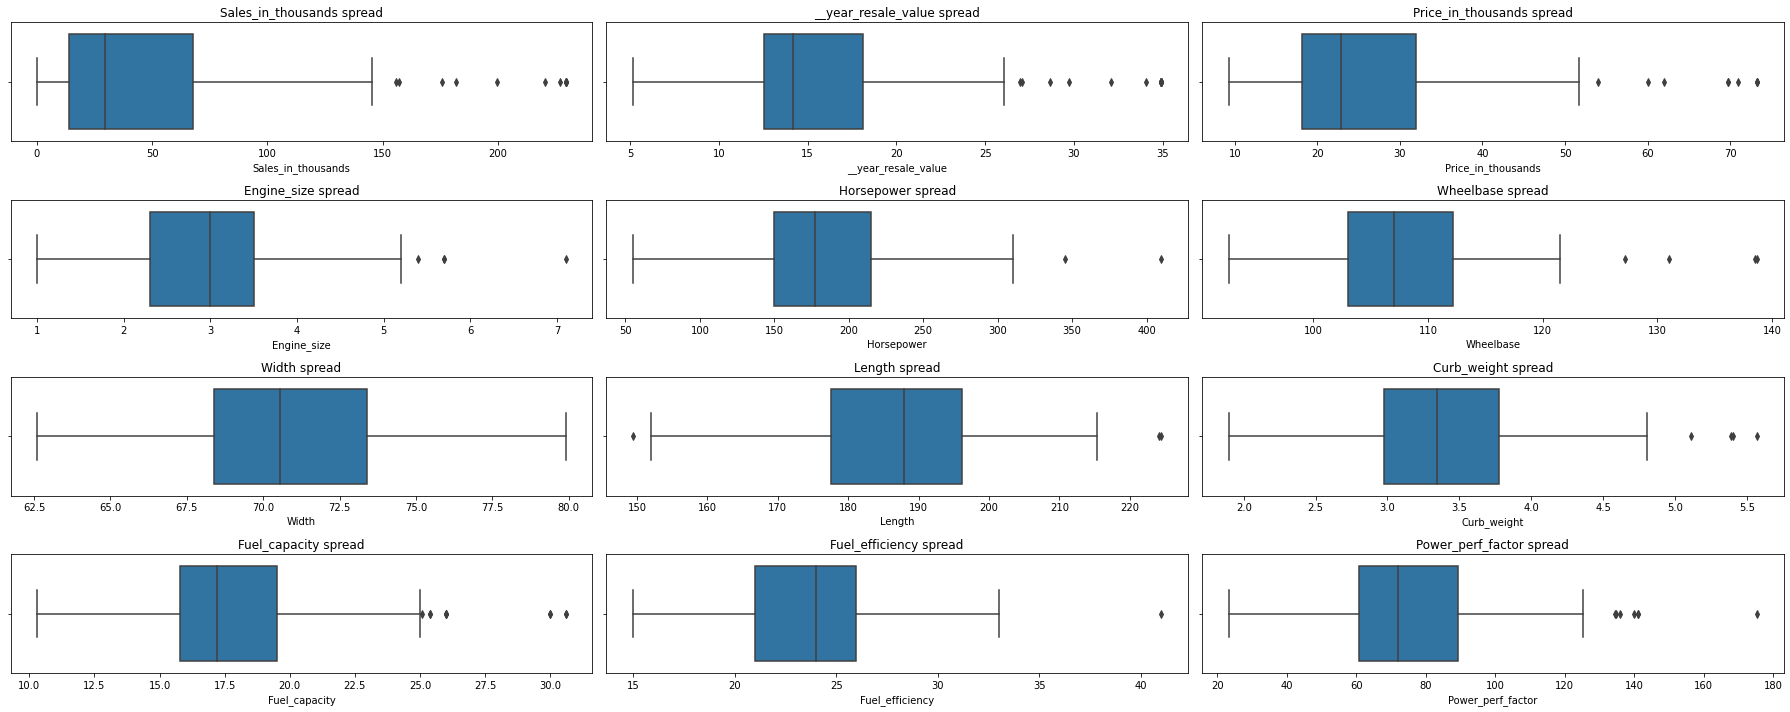

In [73]:
plt.figure(figsize=(25, 10))
for i, x in enumerate(numerical):
  plt.subplot(4, 3, i+1)
  sns.boxplot(x=df[x])
  plt.title(f'{x} spread')
plt.tight_layout()

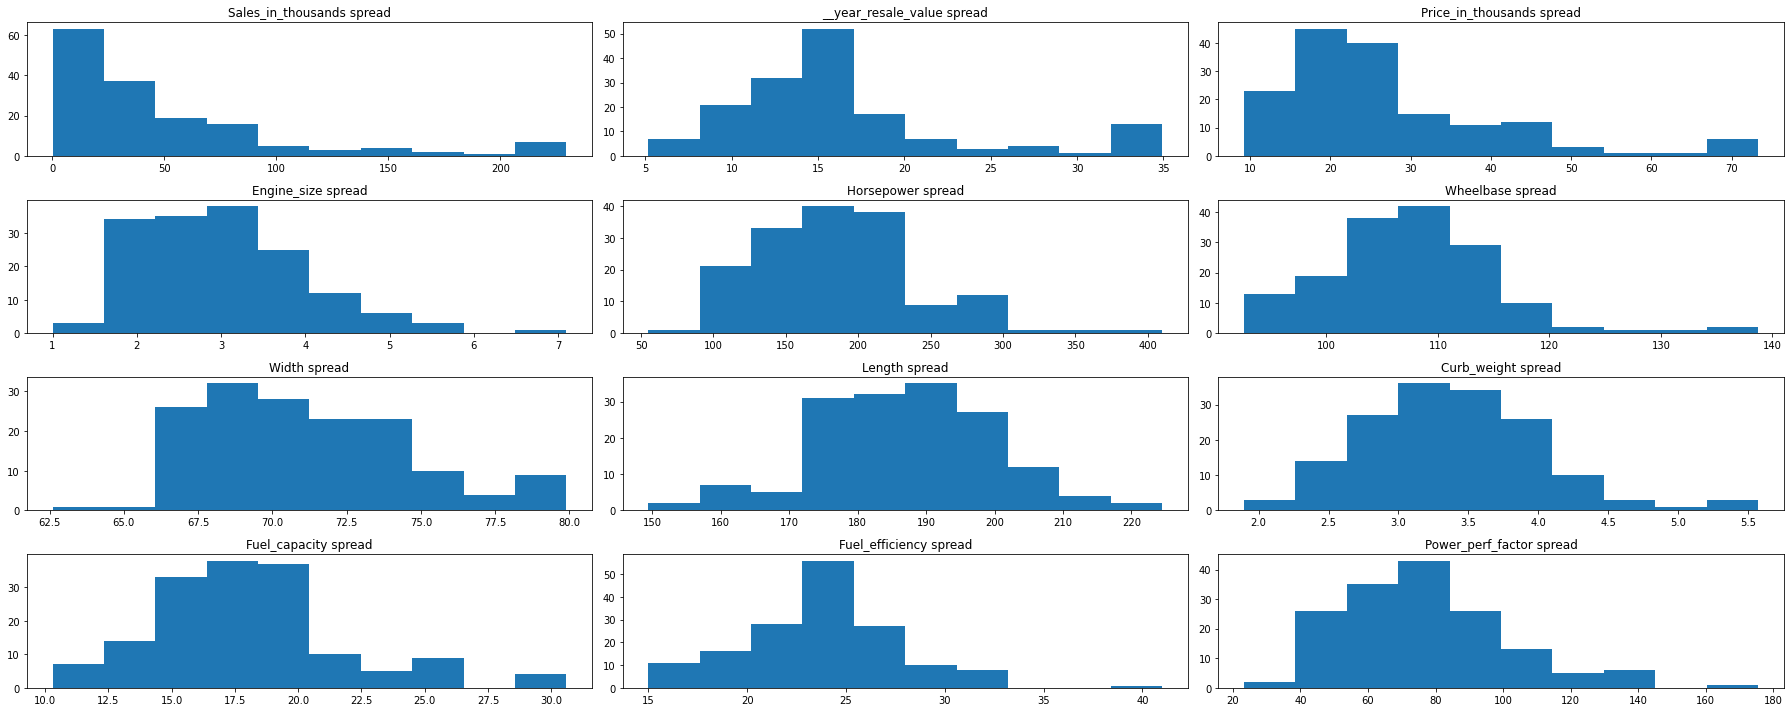

In [74]:
plt.figure(figsize=(25, 10))
for i, x in enumerate(numerical):
  plt.subplot(4, 3, i+1)
  plt.hist(x=df[x])
  plt.title(f'{x} spread')
plt.tight_layout()

In [75]:
# sns.pairplot(df[numerical])

Surprisingly a lot of the data is pretty close to having a normal distrubution with some slightly having a right skew. `Sales_in_thousands` & `Price_in_thousands` are the only numerical sets that are heavily right skewed


# Preprocess data

The data is ready for our neaural network, but first we need to

For the first models we'll remove the date column 

* split into X, y
* create testing and training set
* One-hot encode


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [77]:
df = df.drop(['Latest_Launch'], axis=1)
categorical.remove('Latest_Launch')
df = pd.get_dummies(df)
df.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity',
       ...
       'Model_v40', 'Model_v70', 'Model_villager', 'Model_viper',
       'Model_voyager', 'Model_windstar', 'Model_wrangler', 'Model_xterra',
       'Vehicle_type_car', 'Vehicle_type_passenger'],
      dtype='object', length=200)

In [78]:


scaler = MinMaxScaler()

X = df.drop(['Sales_in_thousands'], axis=1)
y = df.Sales_in_thousands

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





array([[0.163447  , 0.06046838, 0.13114754, ..., 0.        , 0.        ,
        1.        ],
       [0.0903746 , 0.04395004, 0.24590164, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.50265418, 0.27868852, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.58340333, 0.47868852, 0.59016393, ..., 0.        , 0.        ,
        1.        ],
       [0.70183101, 0.35152225, 0.21311475, ..., 0.        , 0.        ,
        1.        ],
       [0.20611456, 0.17416081, 0.2295082 , ..., 0.        , 0.        ,
        1.        ]])

(     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
 0                16.919               16.360              21.500          1.8   
 1                39.384               19.875              28.400          3.2   
 2                14.114               18.225              22.799          3.2   
 3                 8.588               29.725              42.000          3.5   
 4                20.397               22.255              23.990          1.8   
 ..                  ...                  ...                 ...          ...   
 152               3.545               14.180              24.400          1.9   
 153              15.245               14.180              27.500          2.4   
 154              17.531               14.180              28.800          2.4   
 155               3.493               14.180              45.500          2.3   
 156              18.969               14.180              36.000          2.9   
 
      Horsepow

# Create & Explore different models


1/1 [==============================] - 0s 131ms/step - loss: 29.3196 - mae: 29.3196
evaluation: [29.319557189941406, 29.319557189941406]


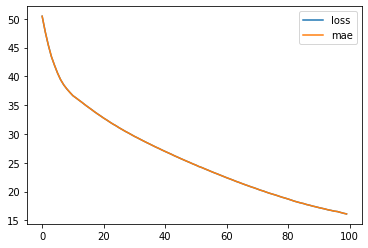

In [89]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(0.1), metrics='mae')


history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=False)
pd.DataFrame(history_1.history).plot()
print('evaluation:', model_1.evaluate(X_test, y_test))

the mae is around 29k. Lets try to add more layers to reduce it

1/1 [==============================] - 0s 140ms/step - loss: 28.7661 - mae: 28.7661
evaluation: [28.766128540039062, 28.766128540039062]


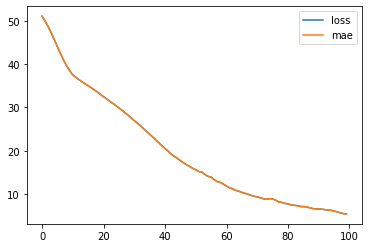

In [104]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(0.01), metrics='mae')


history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=False)
pd.DataFrame(history_2.history).plot()
print('evaluation:', model_2.evaluate(X_test, y_test))

It would seem like the NN bottoms out the mae at around 29K